In [ ]:
# Análisis gráfico
- Visualización de Datos
- Exploramos visualmente el dataset normalizado (`zscore_normalized_all.csv`)
- Los gráficos seleccionados ayudan a entender las distribuciones, relaciones y separabilidad de las características
- En el análisis original de 1995 se consideraron importantes las caracterísicas:
    - `f02` (mean texture)
    - `f24` (worst area)
    - `f25` (worst smoothness)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('..')  # Añade el directorio padre al path
from utils.config import FEATURE_NAMES

# Configuración para visualización
%matplotlib inline
plt.style.use('ggplot')

## Carga de datos

In [3]:
# Cargar el dataset normalizado
df = pd.read_csv('../data/processed/zscore_normalized_all.csv')
print("Primeras 5 filas del dataset normalizado:")
df.head()

Primeras 5 filas del dataset normalizado:


,diagnosis,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,1,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,1,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


## 1. Histograma de Características Normalizadas
Mostramos las distribuciones de:
    - f02 (mean texture)
    - f24 (worst area)
    - f25 (worst smoothness)

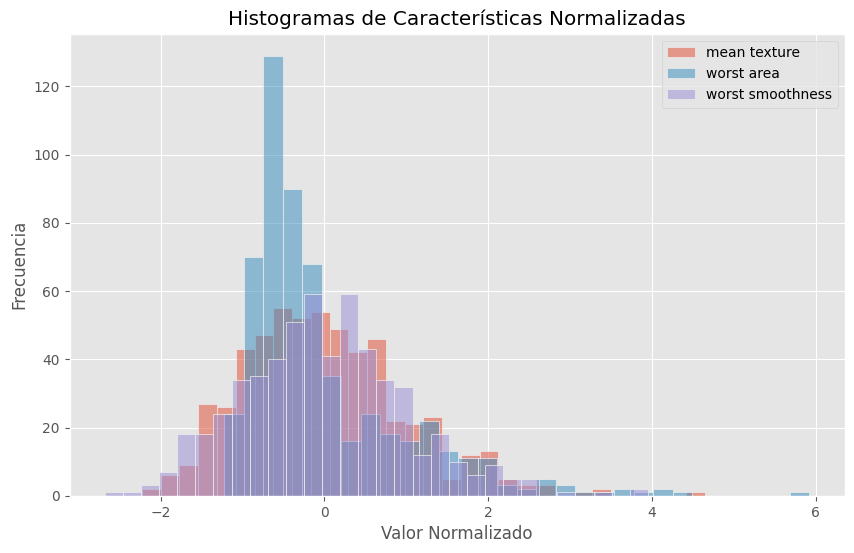

In [4]:
plt.figure(figsize=(10, 6))
for col in ['f02', 'f24', 'f25']:
    sns.histplot(df[col], label=FEATURE_NAMES[col], bins=30, alpha=0.5)
plt.title('Histogramas de Características Normalizadas')
plt.xlabel('Valor Normalizado')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### Otras tres características
Mostramos las distribuciones de:
    - f01 (mean radius)
    - f04 (mean area)
    - f21 (worst radius).

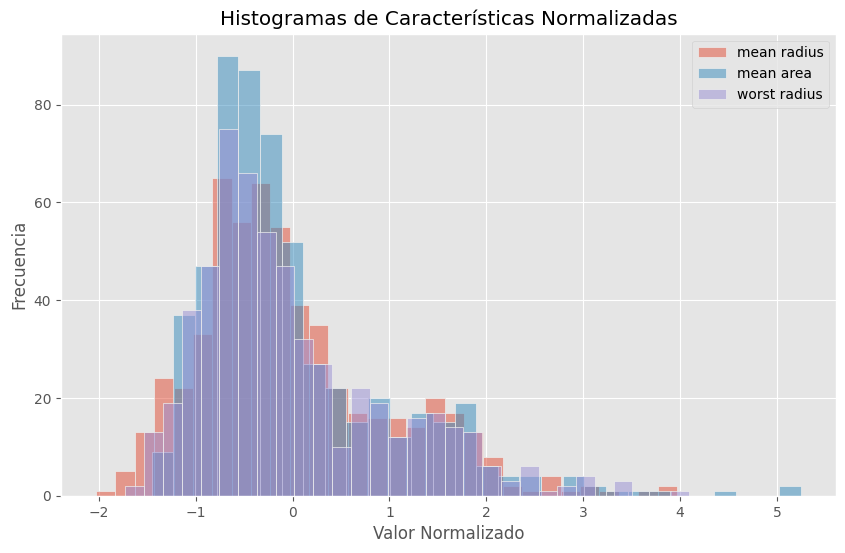

In [5]:
plt.figure(figsize=(10, 6))
for col in ['f01', 'f04', 'f21']:
    sns.histplot(df[col], label=FEATURE_NAMES[col], bins=30, alpha=0.5)
plt.title('Histogramas de Características Normalizadas')
plt.xlabel('Valor Normalizado')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

## 2. Boxplots Comparativos
Comparamos todas las características normalizadas, destacando f02, f24, f25.

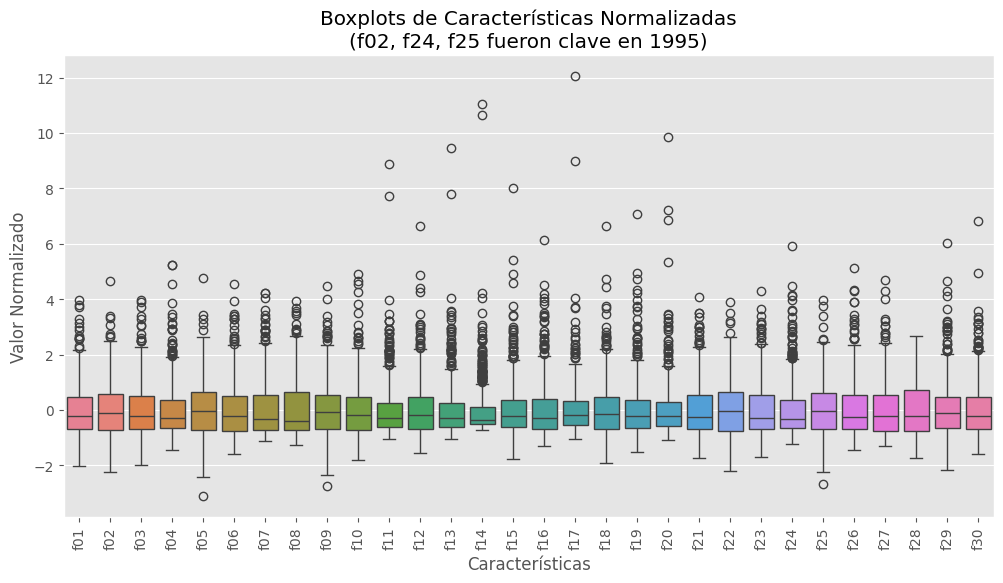

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns='diagnosis'))
plt.xticks(rotation=90)
plt.title('Boxplots de Características Normalizadas\n(f02, f24, f25 fueron clave en 1995)')
plt.xlabel('Características')
plt.ylabel('Valor Normalizado')
plt.show()

## 3. Distribución de Clases

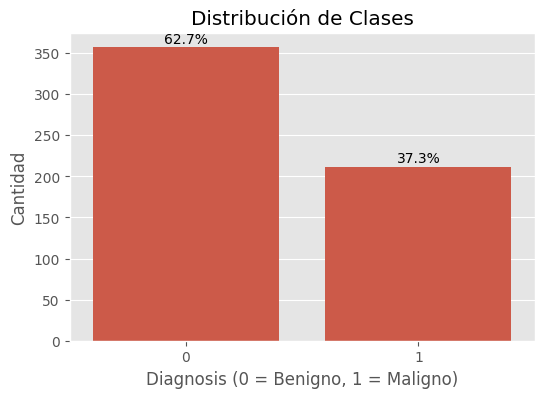

In [7]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='diagnosis', data=df)
plt.title('Distribución de Clases')
plt.xlabel('Diagnosis (0 = Benigno, 1 = Maligno)')
plt.ylabel('Cantidad')
# Añadir porcentajes
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, f'{height/total:.1%}', ha="center")
plt.show()

## 4. Mapa de Calor de Correlaciones

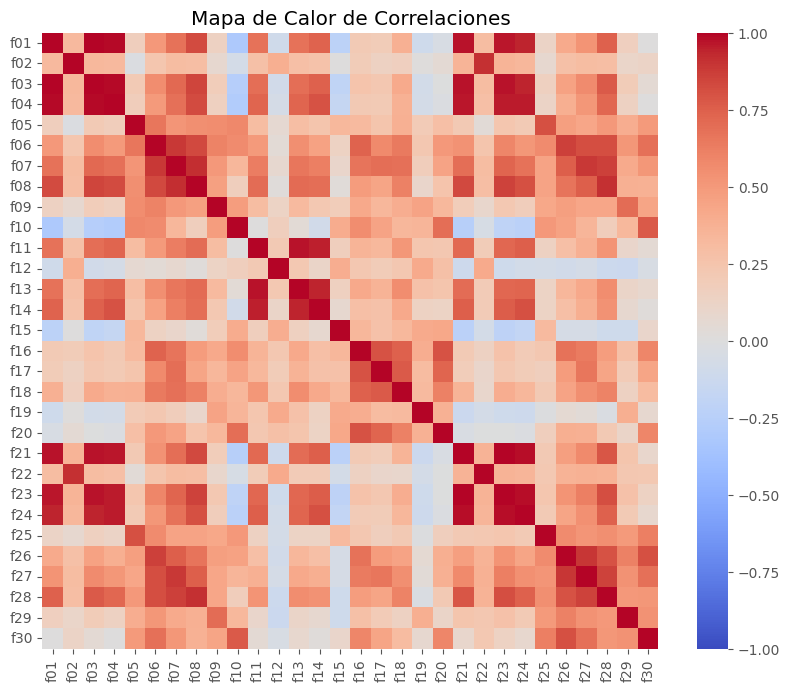

In [8]:
plt.figure(figsize=(10, 8))
corr = df.drop(columns='diagnosis').corr()
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

## 5. Gráficos de Dispersión Bivariados

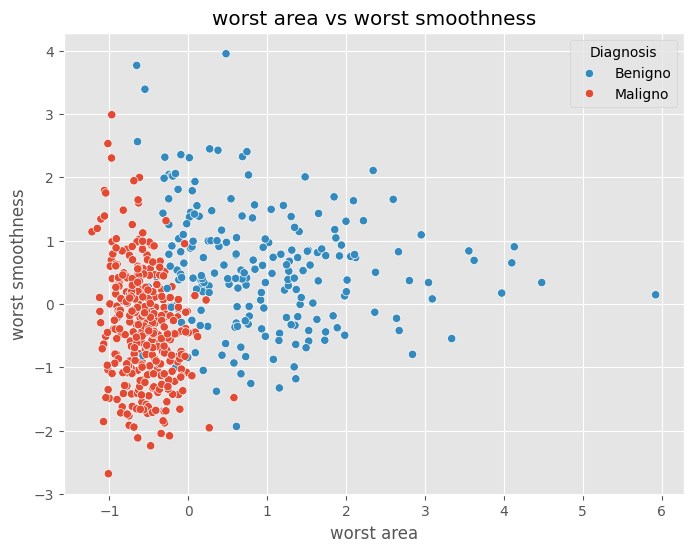

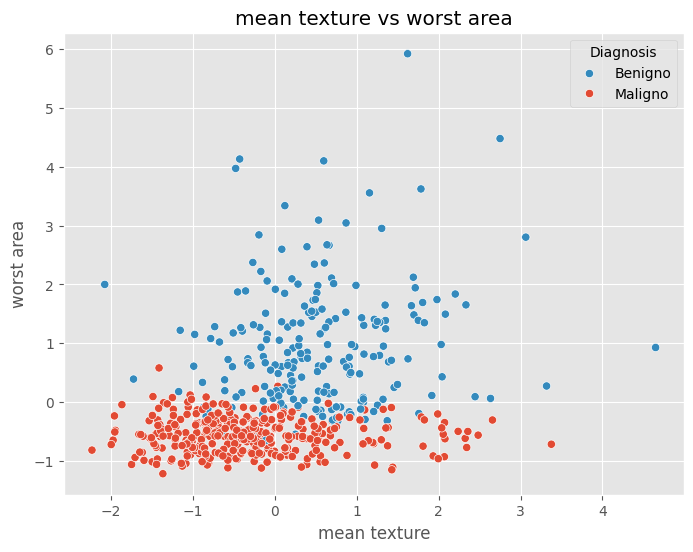

In [9]:
# f24 vs f25
plt.figure(figsize=(8, 6))
sns.scatterplot(x='f24', y='f25', hue='diagnosis', data=df)
plt.title(f'{FEATURE_NAMES["f24"]} vs {FEATURE_NAMES["f25"]}')
plt.xlabel(FEATURE_NAMES['f24'])
plt.ylabel(FEATURE_NAMES['f25'])
plt.legend(title='Diagnosis', labels=['Benigno', 'Maligno'])
plt.show()

# f02 vs f24
plt.figure(figsize=(8, 6))
sns.scatterplot(x='f02', y='f24', hue='diagnosis', data=df)
plt.title(f'{FEATURE_NAMES["f02"]} vs {FEATURE_NAMES["f24"]}')
plt.xlabel(FEATURE_NAMES['f02'])
plt.ylabel(FEATURE_NAMES['f24'])
plt.legend(title='Diagnosis', labels=['Benigno', 'Maligno'])
plt.show()

## 6. Gráficos de Violín por Clase

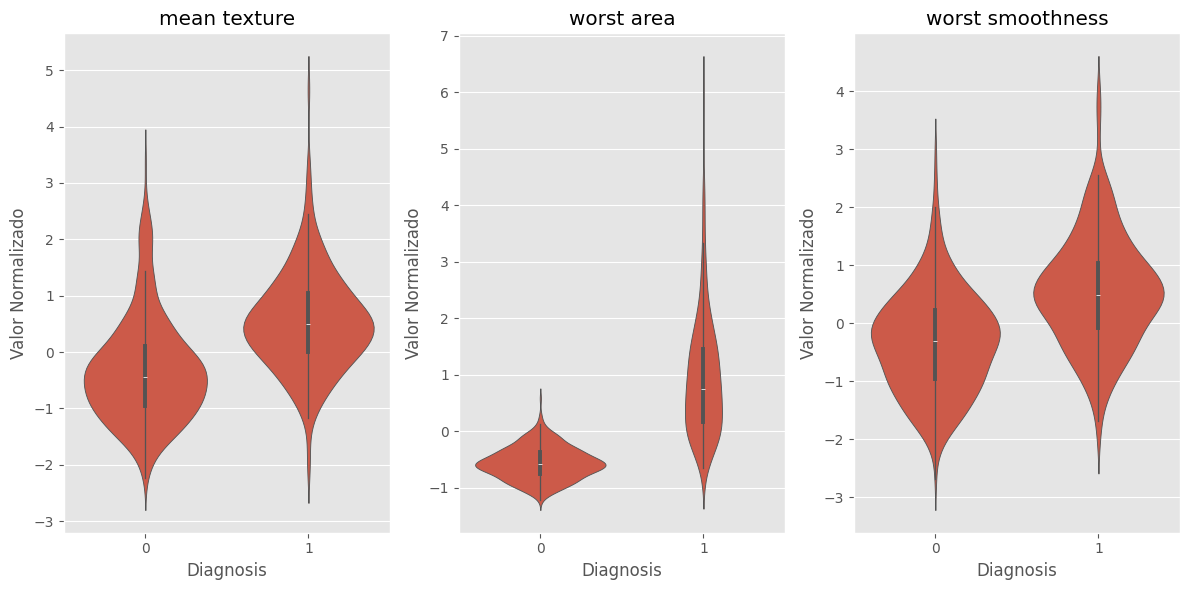

In [10]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['f02', 'f24', 'f25'], 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x='diagnosis', y=col, data=df)
    plt.title(FEATURE_NAMES[col])
    plt.xlabel('Diagnosis')
    plt.ylabel('Valor Normalizado')
plt.tight_layout()
plt.show()